<a href="https://colab.research.google.com/github/geethasri22/Fake_news_detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📰 Fake News Detection using Onion/NotOnion Dataset
### Built with  in Google Colab

**Objective:** Classify news headlines as *Real (NotOnion)* or *Fake (Onion)* using Natural Language Processing and Machine Learning.

In [1]:
!pip install pandas numpy nltk scikit-learn matplotlib seaborn kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import string

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
from google.colab import files

# Option 1: Manually upload onion.csv and notonion.csv
uploaded = files.upload()

Saving notonion.csv to notonion.csv
Saving onion.csv to onion.csv


In [11]:
onion = pd.read_csv('onion.csv')
notonion = pd.read_csv('notonion.csv')

onion['label'] = 1
notonion['label'] = 0

data = pd.concat([onion, notonion], ignore_index=True)
data.head()

,Unnamed: 0,subreddit,author,domain,title,num_comments,score,timestamp,label
0,0,TheOnion,Not_Fully_Awake,theonion.com,‘Just Know It’s Far Worse Than Whatever Presid...,13,1,1589838405,1
1,1,TheOnion,Bubbly_Hat,ogn.theonion.com,Terrifying Implications: Leaked Nintendo Sourc...,0,1,1589835217,1
2,2,TheOnion,Sanlear,local.theonion.com,Nervous New Driver Going To Stick To Sidewalks...,6,1,1589800758,1
3,3,TheOnion,akhilesh12,oneindia.com,"Coronavirus LIVE: COVID-19 cases rise to 96,16...",1,1,1589783343,1
4,4,TheOnion,NoIceJustFire,theonion.com,Teens Hold Clothing Drive For Classmate Who Dr...,5,1,1589756699,1


In [12]:
print("Dataset Shape:", data.shape)
print("\nMissing Values:\n", data.isnull().sum())
print("\nLabel Distribution:\n", data['label'].value_counts())

Dataset Shape: (30000, 9)

Missing Values:
 Unnamed: 0      0
subreddit       0
author          0
domain          0
title           0
num_comments    0
score           0
timestamp       0
label           0
dtype: int64

Label Distribution:
 label
1    15000
0    15000
Name: count, dtype: int64


In [16]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

data['clean_text'] = data['title'].apply(lambda x: clean_text(str(x)))
data[['title', 'clean_text']].head(10)

,title,clean_text
0,‘Just Know It’s Far Worse Than Whatever Presid...,‘just know it’s far worse than whatever presid...
1,Terrifying Implications: Leaked Nintendo Sourc...,terrifying implications leaked nintendo source...
2,Nervous New Driver Going To Stick To Sidewalks...,nervous new driver going to stick to sidewalks...
3,"Coronavirus LIVE: COVID-19 cases rise to 96,16...",coronavirus live cases rise to in india deat...
4,Teens Hold Clothing Drive For Classmate Who Dr...,teens hold clothing drive for classmate who dr...
5,"Donald Trump stares forlornly at his tiny, age...",donald trump stares forlornly at his tiny aged...
6,Onion Explains: The Totalitarian State Of Nort...,onion explains the totalitarian state of north...
7,Drake Fans Accuse Kenny Chesney Of Manipulatin...,drake fans accuse kenny chesney of manipulatin...
8,Teen Boys Losing Virginity Earlier And Earlier...,teen boys losing virginity earlier and earlier...
9,Greta uses her CNN appearance to promote her n...,greta uses her cnn appearance to promote her n...


In [19]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if not w in stop_words]
    return " ".join(tokens)

nltk.download('punkt_tab')
data['clean_text'] = data['clean_text'].apply(preprocess)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
X = data['clean_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (24000,)
Test size: (6000,)


In [21]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF vectorization complete.")

TF-IDF vectorization complete.


In [22]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("✅ Model Training Complete!")

✅ Model Training Complete!


Accuracy: 0.8706666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      2952
           1       0.84      0.92      0.88      3048

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



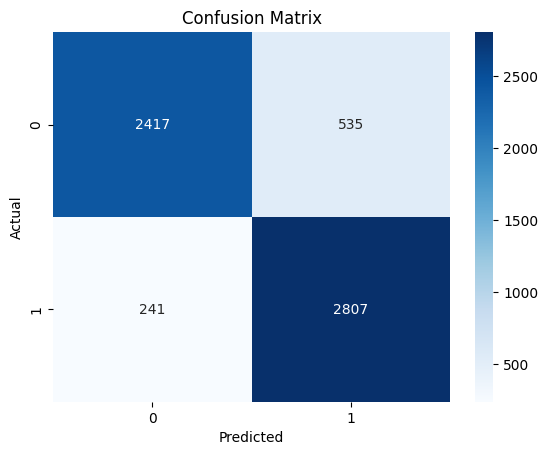

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
def predict_headline(text):
    clean = clean_text(text)
    clean = preprocess(clean)
    vec = vectorizer.transform([clean])
    pred = model.predict(vec)[0]
    return "🧅 Fake (The Onion)" if pred == 1 else "📰 Real News"

headline = input("Enter a headline: ")
print(predict_headline(headline))

Enter a headline: help
📰 Real News


In [25]:
import pickle

with open('fake_news_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [26]:
!pip install gradio

import gradio as gr
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

# Load model and vectorizer if you saved them earlier, or reuse the trained ones
def predict_news(text):
    pred = model.predict(tfidf_vectorizer.transform([text]))
    return "✅ Real News" if pred[0] == 'REAL' else "❌ Fake News"

# Create app interface
app = gr.Interface(
    fn=predict_news,
    inputs=gr.Textbox(lines=3, placeholder="Enter news article text..."),
    outputs="text",
    title="Fake News Detection App",
    description="Enter any news text to check if it's fake or real."
)

app.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7af4662af740f5cb04.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
